In [1]:
#第15章/安装最新版本的diffusers库
#需要最新版本的diffusers库支持
#!git clone https://github.com/huggingface/diffusers
#!pip install -e ./diffusers

import diffusers

diffusers.__version__

'0.18.0.dev0'

In [2]:
#第15章/定义测试函数
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from matplotlib import pyplot as plt
%matplotlib inline
import torch


def test(pipeline):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    pipeline = pipeline.to(device)
    
    images = pipeline('maorongrong cat sitting in a bucket',
                      num_images_per_prompt=4,
                      num_inference_steps=100,
                      guidance_scale=6.0,
                      eta=1.0).images

    plt.figure(figsize=(20, 10))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/100 [00:00<?, ?it/s]

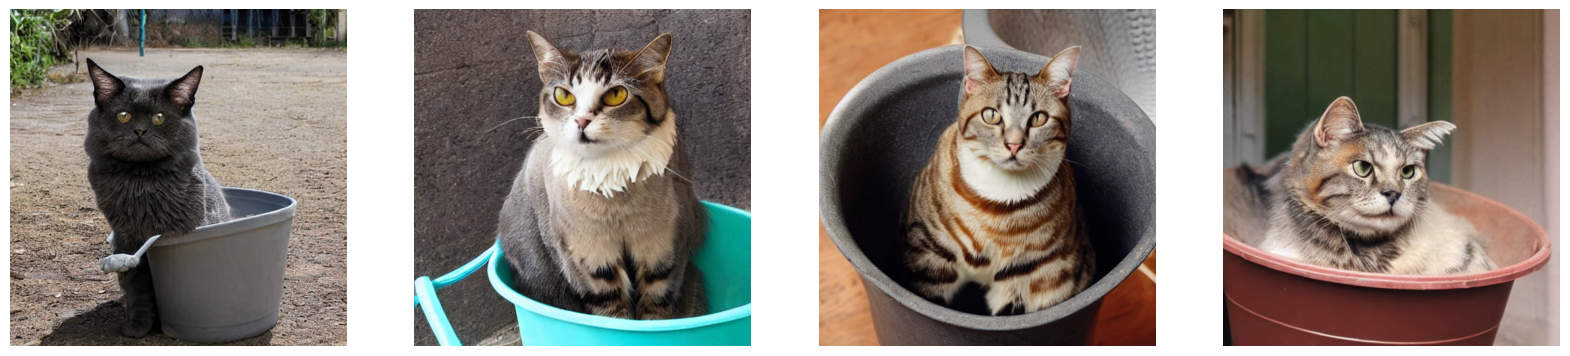

In [3]:
#第15章/测试训练前的模型
pipeline = DiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4',
                                             safety_checker=None)

test(pipeline)

  0%|          | 0/100 [00:00<?, ?it/s]

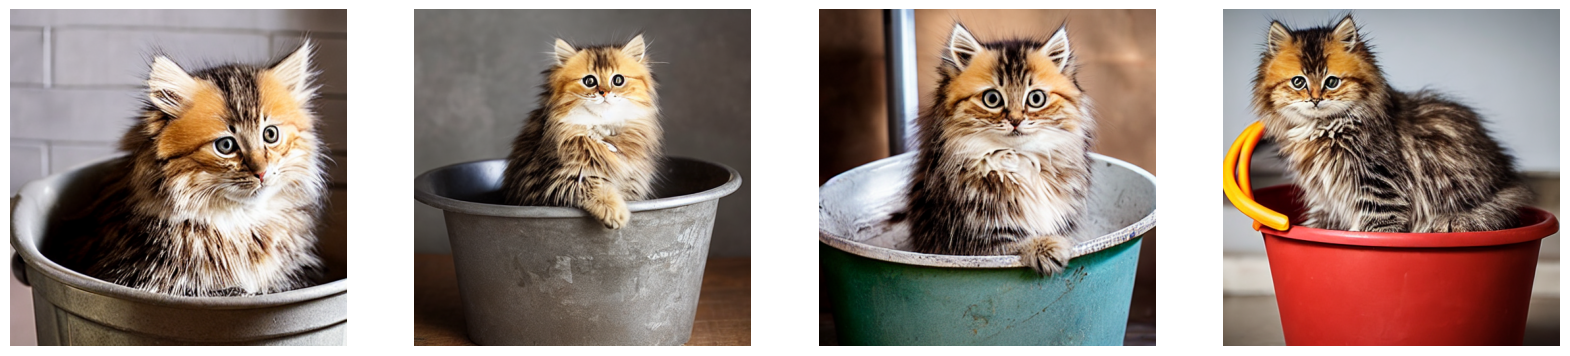

In [4]:
#第15章/测试训练好的模型
pipeline.load_textual_inversion('./save', weight_name='embed_weight.bin')

pipeline.unet.load_attn_procs(
    './save', weight_name='pytorch_custom_diffusion_weights.bin')

test(pipeline)